In [14]:
# Import necessary libraries for loading the dataset
import torch
from torchvision import datasets, transforms
from custom_labels import label_mapping, apply_custom_labels

# Load the fashion MNIST dataset with custom labels

In [15]:
labels = list(label_mapping.keys())

In [16]:
data_path = '../data'

transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.FashionMNIST(root=data_path, train=True, transform=transform, download=True)
train_dataset.targets = apply_custom_labels(train_dataset.targets)

test_dataset = datasets.FashionMNIST(root=data_path, train=False, transform=transform, download=True)
test_dataset.targets = apply_custom_labels(test_dataset.targets)


# Exploratory Data Analysis

In [17]:
# importing libraries needed for EDA
import matplotlib.pyplot as plt
import numpy as np
import random

### Dataset sample vizualization 

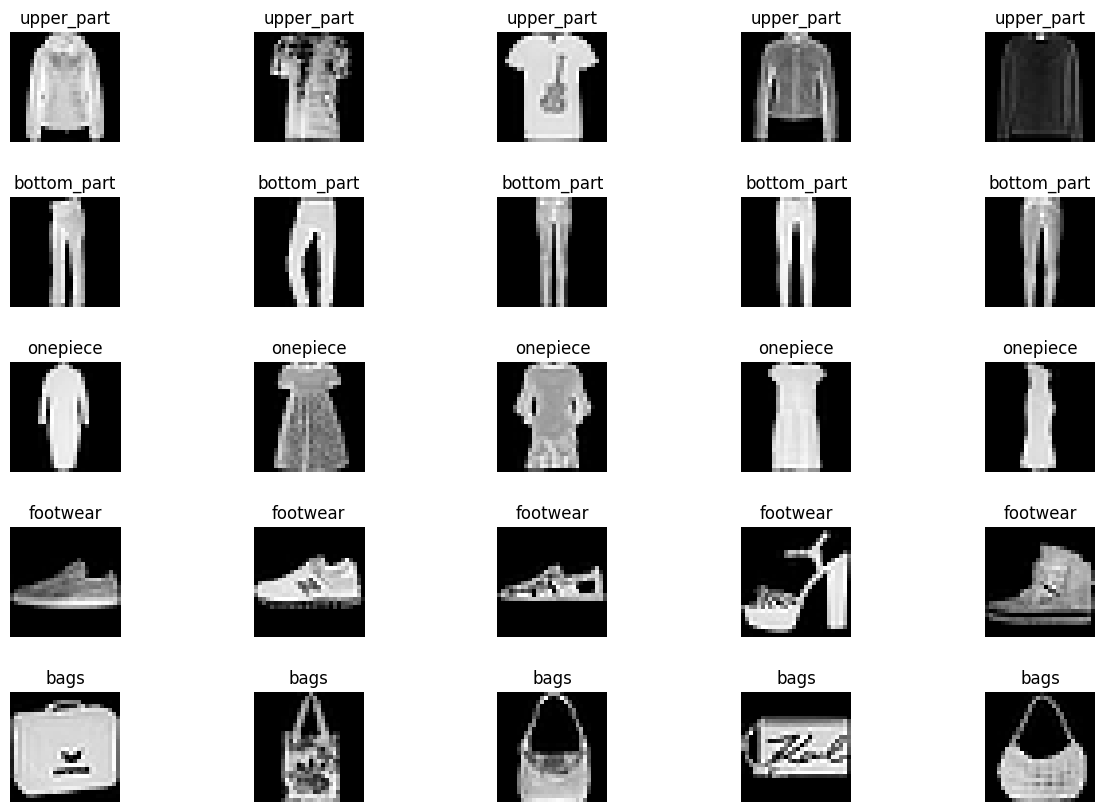

In [18]:
def display_sample_images(dataset, label_mapping, num_samples_per_class=5):
    """
    Display random samples from a dataset.
    Parameters:
    dataset (torch.utils.data.Dataset): 
        Dataset to sample from.
    label_mapping (dict): 
        Dict of class labels and their names to sample from.
    num_samples_per_class (int): 
        Number of samples to display per class label.
    """
    fig, axes = plt.subplots(len(label_mapping), num_samples_per_class, figsize=(15, 10))
    
    for i, label in enumerate(label_mapping):
        class_indices = torch.where(dataset.targets == i)[0]
        random_indices = random.sample(list(class_indices), num_samples_per_class)
        
        for j, idx in enumerate(random_indices):
            image, _ = dataset[idx]
            axes[i, j].imshow(image.squeeze().numpy(), cmap='gray')
            axes[i, j].set_title(label_mapping[i])
            axes[i, j].axis('off')
    
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    plt.show()

# Display sample images from each class in the training dataset
display_sample_images(train_dataset, label_mapping)

### Class distribution 

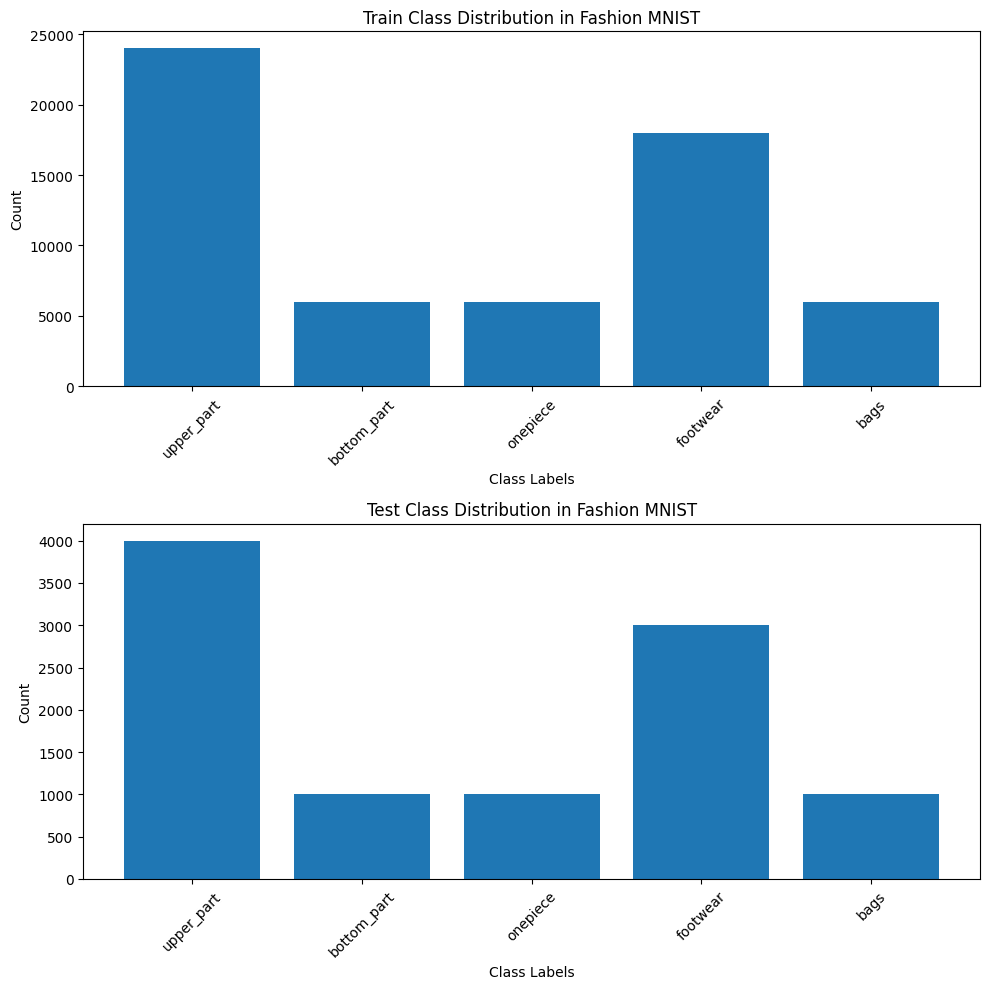

In [19]:
train_class_counts = torch.bincount(train_dataset.targets)
test_class_counts = torch.bincount(test_dataset.targets)

fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot train class distribution
axes[0].bar(list(label_mapping.values()), train_class_counts)
axes[0].set_xlabel('Class Labels')
axes[0].set_ylabel('Count')
axes[0].set_title('Train Class Distribution in Fashion MNIST')
axes[0].tick_params(axis='x', rotation=45)

# Plot test class distribution
axes[1].bar(list(label_mapping.values()), test_class_counts)
axes[1].set_xlabel('Class Labels')
axes[1].set_ylabel('Count')
axes[1].set_title('Test Class Distribution in Fashion MNIST')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

From the above plots, we can observe two things:
 1. The train and test data distribution per class follows same pattern, showcasing us that the test dataset is representative of the train dataset at hand
 2. Number of smaples per each class is not balanced, providing us information regarding class imbalance problem. This must be taken into account during the training of any ML/DL algorithm. As skewness can impace the learning of the algorithm and models performance.

### Pixel analysis

In [20]:
min_pixel_value = train_dataset.data.min()
max_pixel_value = train_dataset.data.max()
print(f"Minimum Pixel Value: {min_pixel_value}")
print(f"Maximum Pixel Value: {max_pixel_value}")

Minimum Pixel Value: 0
Maximum Pixel Value: 255


As the pixel range is in [0,255] , we can normalize the dataset to help our NN to converge. However, depending on the NN we are going to experiment with we can train/test with and without normalization to take a decision.

### Other analysis we can do
  1. As we created new labels here and these label information is providing us clear definitions of different clusters (In Fashion MNIST github we can see the clusters). In cases when we do not have context on the data or its labels, we can reduce the dimensionality of our image data and view it in lower dimensionality space to see the clusters/patterns of our data. It can help us to identify the complexity of our data, if some of the classes are overlapping or really close, it can be an explanation for the misclassification between these classes. In those cases, we might even add new textual or other information as new features.
  2. Analyzing image sizes: As the current dataset at hand is curated one, in other cases, we can vizualize the image dimensions of different labels to determine whether we have consistent image dimensions or not.